### Блок импорта библиотек

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge #Линейная регрессия
from sklearn.tree import DecisionTreeRegressor #Деревья решений
from sklearn.neighbors import KNeighborsRegressor #К-ближ. соседей
from sklearn.model_selection import train_test_split #модель разбиения данных на тест и обучение
from sklearn.preprocessing import StandardScaler, MinMaxScaler,scale #Модель нормализации данных
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Загрузка данных
data=pd.read_csv('movie_metadata.csv', sep=',')

### Первичный просмотр данных

In [4]:
#Чтобы посмотреть первые N строк данных используем команду
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
#Информация о составе колонок и их типе, числе заполненных записей.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Предобработка данных

In [6]:
"""Выделим имена колонок для этого воспользуемся циклом FOR"""
for i in data.columns:
    print(i)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
"""Выберем в качестве целевой переменной число лайков в фейсбук к фильму (т.е. популярность фильма в соц.сетях)"""
target_col=['movie_facebook_likes']

In [9]:
data[target_col].iloc[:1]
data.iloc[0][1]
data.iloc[0, :]



color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

In [10]:
"""Выделим только вещественные признаки для простоты, воспользуясь list_comprehension"""
float_col=[col for col in data.columns if data[col].dtypes!=object and col not in target_col]

In [11]:
float_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio']

In [12]:
"""Восстановим пропуски в данных 3 способами"""
#1. Медианой
data_median=data[float_col].fillna(data[float_col].median())
data_mean=data[float_col].fillna(data[float_col].mean())
data_0=data[float_col].fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDBF27B8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EDBFB18390>]], dtype=object)

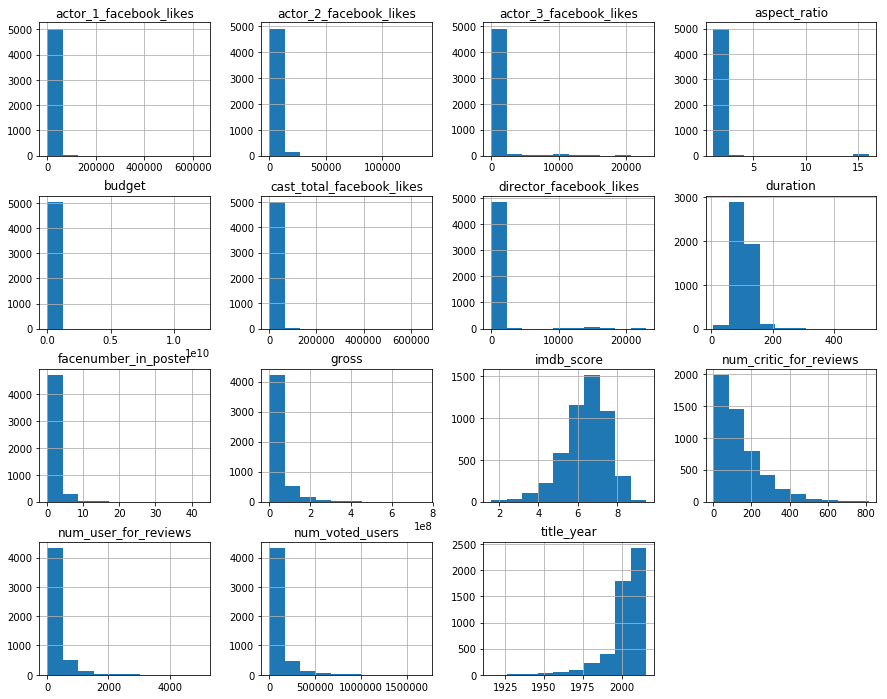

In [13]:
"""Посмотрим на распределение признаков"""

data_median.hist(figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFC1589B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CFC15EF8D0>]], dtype=object)

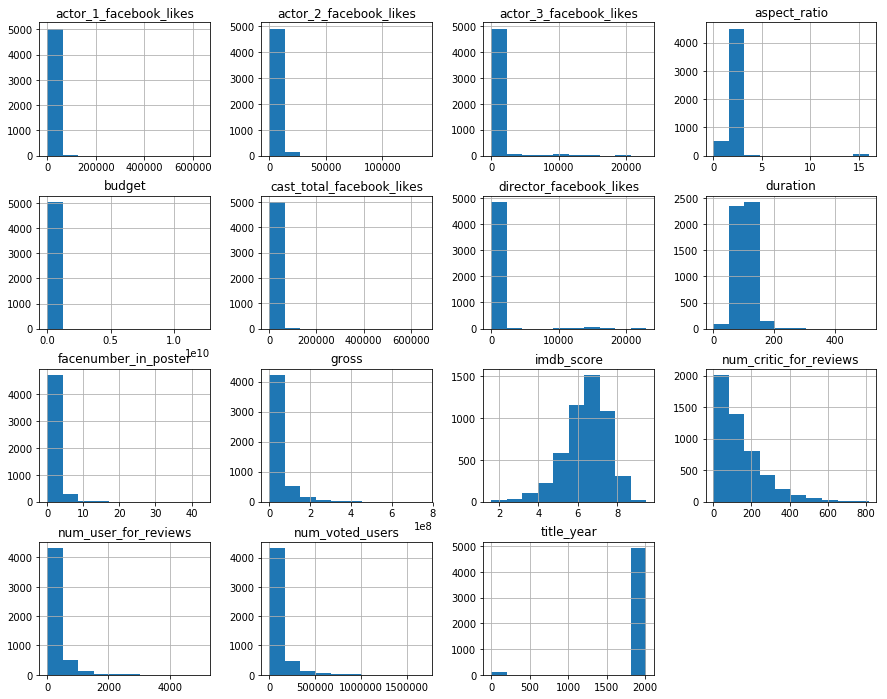

In [15]:
"""Посмотрим на распределение признаков"""
data_0.hist(figsize=(15,12))



#### Выводы:
Восстановление при помощи зануления пропусков смещает выборку к "0"
Поэтому воспользуемся по желанию выборкой восстановленной по медиане или среднему

------------------------ 

### Моделирование

In [16]:
X=data_median
Y=data[target_col]

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

### K-NN

In [18]:
"""Т.к. данный представлены в разных масштабах произведем нормирование данных к [0,1]"""
MinMax=MinMaxScaler()
MinMax.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_t_minmax=MinMax.transform(X_train)
X_te_minmax=MinMax.transform(X_test)

In [20]:
knn=KNeighborsRegressor(6)

In [21]:
knn.fit(X_t_minmax, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [22]:
knn.score(X_te_minmax,y_test)

0.69334461484049048

K is:  2 |R^2 is:  0.648940490085
K is:  3 |R^2 is:  0.675990108818
K is:  4 |R^2 is:  0.678865078384
K is:  5 |R^2 is:  0.683284488546
K is:  6 |R^2 is:  0.69334461484
K is:  7 |R^2 is:  0.690215988384
K is:  8 |R^2 is:  0.682714280747
K is:  9 |R^2 is:  0.672361704342
K is:  10 |R^2 is:  0.672096077072
K is:  11 |R^2 is:  0.681737122879
K is:  12 |R^2 is:  0.685537740523
K is:  13 |R^2 is:  0.688213818861
K is:  14 |R^2 is:  0.690755456851


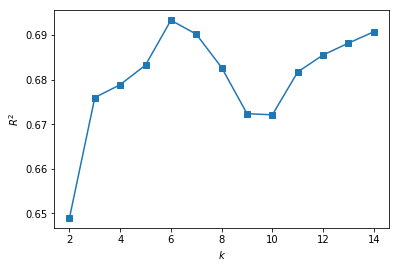

In [23]:
"""Изобразим график обучения"""
scores=[]
for k in range(2, 15):
    knn=KNeighborsRegressor(k).fit(X_t_minmax, y_train)
    scores.append(knn.score(X_te_minmax,y_test))
    print('K is: ', k,'|R^2 is: ', knn.score(X_te_minmax,y_test))
plt.plot(range(2, 15), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$R^2$');

K is:  2 |R^2 is:  -0.144563761935
K is:  3 |R^2 is:  -0.0367252929425
K is:  4 |R^2 is:  0.00446029484361
K is:  5 |R^2 is:  0.035129319927
K is:  6 |R^2 is:  0.0587313218177
K is:  7 |R^2 is:  0.0755083126272
K is:  8 |R^2 is:  0.0993097022803
K is:  9 |R^2 is:  0.103726939435
K is:  10 |R^2 is:  0.110526060969
K is:  11 |R^2 is:  0.125156038619
K is:  12 |R^2 is:  0.141682683159
K is:  13 |R^2 is:  0.149719638926
K is:  14 |R^2 is:  0.157107002012
K is:  15 |R^2 is:  0.159602553803
K is:  16 |R^2 is:  0.1575199621
K is:  17 |R^2 is:  0.153007484604
K is:  18 |R^2 is:  0.145228139438
K is:  19 |R^2 is:  0.146392651901
K is:  20 |R^2 is:  0.146142576141


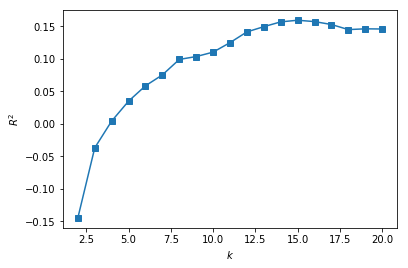

In [70]:
"""Изобразим график обучения но для не нормированных данных"""
scores=[]
for k in range(2, 21):
    knn=KNeighborsRegressor(k).fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
    print('K is: ', k,'|R^2 is: ', knn.score(X_test,y_test))
plt.plot(range(2, 21), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$R^2$');

### LinearRegression

In [71]:
lr=LinearRegression()
ridge=Ridge(alpha=5)
lasso=Lasso(alpha=10)

In [72]:
"""Т.к. линейные модели чувствительны к масштабу и требуют `нормальности` """
std_scaler=StandardScaler()
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
X_t_std=std_scaler.transform(X_train)
X_te_std=std_scaler.transform(X_test)

In [74]:
lr.fit(X_t_std, y_train)
ridge.fit(X_t_std, y_train)
lasso.fit(X_t_std, y_train)

C:\Users\AlexConda\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
models={
   'Linear_regression': lr, 
    'Ridge': ridge, 
    'Lasso': lasso
}

In [76]:
for i in models:
    print(i, models[i].score(X_te_std, y_test))

Linear_regression 0.564321292885
Ridge 0.566428495119
Lasso 0.567295175664


### DTrees

In [80]:
dtree=DecisionTreeRegressor(random_state=1234)

In [81]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [82]:
dtree.score(X_test, y_test)

0.6473764158979568

Depth is:  1 |R^2 is:  0.441673590712
Depth is:  2 |R^2 is:  0.586370763074
Depth is:  3 |R^2 is:  0.635246229357
Depth is:  4 |R^2 is:  0.720900857499
Depth is:  5 |R^2 is:  0.726239179215
Depth is:  6 |R^2 is:  0.717847293525
Depth is:  7 |R^2 is:  0.74116409402
Depth is:  8 |R^2 is:  0.63817950817
Depth is:  9 |R^2 is:  0.615545492324
Depth is:  10 |R^2 is:  0.646499125441
Depth is:  11 |R^2 is:  0.614593614301
Depth is:  12 |R^2 is:  0.657154875747
Depth is:  13 |R^2 is:  0.644503514806
Depth is:  14 |R^2 is:  0.614773452075
Depth is:  15 |R^2 is:  0.639658610214


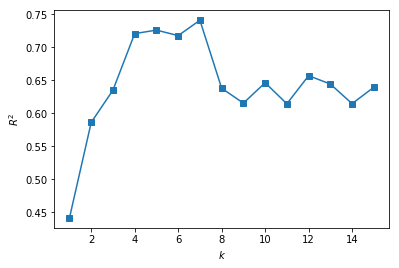

In [83]:
"""Изобразим график обучения и посмотрим как глубина дерева влияет на точность"""
scores=[]
for n in np.arange(1,16):
    dtree=DecisionTreeRegressor(max_depth=n, random_state=1234).fit(X_train, y_train)
    scores.append(dtree.score(X_test, y_test))
    print('Depth is: ', n,'|R^2 is: ', dtree.score(X_test, y_test))
plt.plot(range(1,16), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$R^2$');

In [84]:
X_train.shape

(4034, 15)

MaxFeatures is:  2 |R^2 is:  0.4702940024
MaxFeatures is:  3 |R^2 is:  0.625354772675
MaxFeatures is:  4 |R^2 is:  0.648378992005
MaxFeatures is:  5 |R^2 is:  0.69885433581
MaxFeatures is:  6 |R^2 is:  0.647958751438
MaxFeatures is:  7 |R^2 is:  0.674512959132
MaxFeatures is:  8 |R^2 is:  0.738991960899
MaxFeatures is:  9 |R^2 is:  0.747081485935
MaxFeatures is:  10 |R^2 is:  0.732523606068
MaxFeatures is:  11 |R^2 is:  0.699334604413
MaxFeatures is:  12 |R^2 is:  0.749128529267
MaxFeatures is:  13 |R^2 is:  0.736376028268
MaxFeatures is:  14 |R^2 is:  0.782611698769
MaxFeatures is:  15 |R^2 is:  0.717847293525


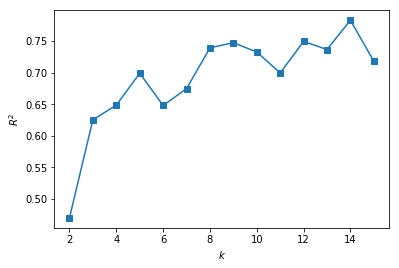

In [86]:
"""Изобразим график обучения и посмотрим как ширина дерева влияет на точность"""
scores=[]

for n in np.arange(2,16):
    dtree=DecisionTreeRegressor(max_depth=6, max_features=n, random_state=41).fit(X_train, y_train)
    scores.append(dtree.score(X_test, y_test))
    print('MaxFeatures is: ', n,'|R^2 is: ', dtree.score(X_test, y_test))
plt.plot(range(2, 16), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$R^2$');

### BONUS RandomForestRegressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
RF_reg=RandomForestRegressor(n_estimators=15,
                               oob_score=True,
                               random_state=1)

In [89]:
RF_reg.fit(X_train, y_train)

C:\Users\AlexConda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\AlexConda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [90]:
RF_reg.score(X_test, y_test)

0.8560507688652218

Estimators is:  50 |R^2 is:  0.850463522256
Estimators is:  60 |R^2 is:  0.852316497894
Estimators is:  70 |R^2 is:  0.851059840085
Estimators is:  80 |R^2 is:  0.850230803436
Estimators is:  90 |R^2 is:  0.851588217878
Estimators is:  100 |R^2 is:  0.853934136145


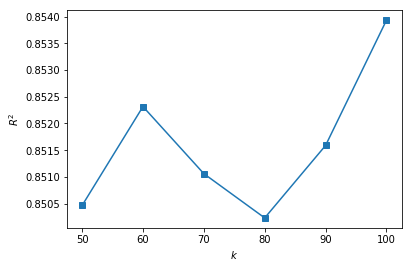

In [91]:
"""Изобразим график обучения и посмотрим как число деревьев в лесу влияет на точность"""
scores=[]
for n in np.arange(50,110,10):
    RF_reg=RandomForestRegressor(n_estimators=n,random_state=42).fit(X_train, y_train.movie_facebook_likes)
    scores.append(RF_reg.score(X_test, y_test.movie_facebook_likes))
    print('Estimators is: ', n,'|R^2 is: ', RF_reg.score(X_test, y_test.movie_facebook_likes))
plt.plot(range(50, 110, 10), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$R^2$');

### ЗАДАЧА:
1. Поиграться с парамтерами каждой из моделей и выбить наибольший возможный скор по R^2
2. Почитать об алгоритмах:
    RF - https://alexanderdyakonov.wordpress.com/2016/11/14/случайный-лес-random-forest/ ;
    Linear Regression- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html ;
   RF at sklearn - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html ; 
   K-NN at sklearn - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor; 
    Пример спортивного анализа данных (для ознокамления) https://habrahabr.ru/post/202090/